missing_val_count_by_column = (data.isnull().sum())
data_without_missing_values = original_data.dropna(axis=1)

cols_with_missing = [col for col in original_data.columns if original_data[col].isnull
reduced_original_data = original_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing, axis=1)


#### BETTER OPTION

In [2]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(origal_data)

NameError: name 'origal_data' is not defined

# Example 

In [7]:
import pandas as pd
# Load data

melb_data = pd.read_csv ('dataset/Melbourne/melb_data.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = melb_data.Price
melb_pred = melb_data.drop(['Price'],axis=1)

melb_numeric_predictors = melb_pred.select_dtypes(exclude=['object'])

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(melb_numeric_predictors,melb_target,train_size=0.7,test_size=0.3,random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [17]:
# model score for dropping colums with missing values

cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)
print(score_dataset(reduced_X_train,reduced_X_test,y_train,y_test))

181636.32014125583


In [21]:
# Model scuroe for imputtion

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_x_train = my_imputer.fit_transform(X_train)
imputed_x_test = my_imputer.transform(X_test)
print(f'MAE: {score_dataset(imputed_x_train,imputed_x_test,y_train,y_test)}')

MAE: 173344.12185944937


In [2]:
import pandas as pd

df = pd.DataFrame({
    'A': [ 1, 2, None, 4],
    'B': [None, 2,3,4],
    'C': [1,2,3,None]})

print(df)
df_dropped_rows = df.dropna()
df_dropped_rows
# dropping rows

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  4.0  NaN


,A,B,C
1,2.0,2.0,2.0


In [4]:
# Dropping columns with missing values 

df = pd.DataFrame({
    'A': [ 1, 2, 4, 4],
    'B': [None, 2,3,4],
    'C': [1,2,3,None]})
df_dropped_cols = df.dropna(axis=1)
df_dropped_cols

,A
0,1
1,2
2,4
3,4


In [5]:
# Imputation Techniques
#mean
df_mean_imputated = df.fillna(df.mean())
df_mean_imputated


,A,B,C
0,1,3.0,1.0
1,2,2.0,2.0
2,4,3.0,3.0
3,4,4.0,2.0


In [8]:
#median
print(df.fillna(df.median()))

   A    B    C
0  1  3.0  1.0
1  2  2.0  2.0
2  4  3.0  3.0
3  4  4.0  2.0


In [13]:
# mode imputaion for each column
df_imputated_mode = df.fillna(df.mode().iloc[0])
print(df_imputated_mode)
df.iloc[3]# Prints out the specific row


   A    B    C
0  1  2.0  1.0
1  2  2.0  2.0
2  4  3.0  3.0
3  4  4.0  1.0


A    4.0
B    4.0
C    NaN
Name: 3, dtype: float64

In [11]:
# Knn method
import pandas as pd
from sklearn.impute import KNNImputer
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, 2, 3, None]
})
print(df)
knn_imputer = KNNImputer(n_neighbors=2) # Defining the class and passing the constructor parameter
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_knn_imputed) # it returns a dataframe with impued values, colums have to be specified additionally .

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  4.0  NaN
     A    B    C
0  1.0  2.5  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  4.0  2.5


In [13]:
#Linear Interpolation
print(df)
df_interpolated = df.interpolate()
print(df_interpolated) # prior value is added 

     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  NaN  3.0  3.0
3  4.0  4.0  NaN
     A    B    C
0  1.0  NaN  1.0
1  2.0  2.0  2.0
2  3.0  3.0  3.0
3  4.0  4.0  3.0


In [14]:
# Spline Interpolation

df_spline_interpolated = df.interpolate(method='spline', order=2)
df_spline_interpolated

,A,B,C
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0
3,4.0,4.0,4.0


In [ ]:
#Iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [1, 2, 3, None]
})

iter_imputer = IterativeImputer()
df_iter_impute = pd.DataFrame(iter_imputer.fit_transform(df)

In [16]:
import torch
import torch.nn as nn
import torchvision.models as models

class FeatureExtractionModel(nn.Module):
    def __init__(self, num_classes):
        super(FeatureExtractionModel, self).__init__()
        
        # Backbone network
        resnet = models.resnet50(pretrained=True)
        
        # Define layers to extract intermediate feature maps
        self.layer1 = nn.Sequential(*list(resnet.children())[:5])  # Output: C2
        self.layer2 = nn.Sequential(*list(resnet.children())[5])   # Output: C3
        self.layer3 = nn.Sequential(*list(resnet.children())[6])   # Output: C4
        self.layer4 = nn.Sequential(*list(resnet.children())[7])   # Output: C5
        
        # Feature Pyramid Network (FPN)
        self.fpn = FPN(in_channels_list=[256, 512, 1024, 2048], out_channels=256)
        
        # Classification Head
        self.classification_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )
        
        # Localization Head
        self.localization_head = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 4, kernel_size=1)
        )
        
        # Segmentation Head
        self.segmentation_head = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(256, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        # Extract intermediate feature maps
        c2 = self.layer1(x)
        c3 = self.layer2(c2)
        c4 = self.layer3(c3)
        c5 = self.layer4(c4)
        
        # Apply FPN to get multi-scale features
        fpn_outputs = self.fpn([c2, c3, c4, c5])
        
        # Use the highest level feature map for heads
        p4 = fpn_outputs[-1]
        
        # Classification output
        classification_output = self.classification_head(p4)
        
        # Localization output
        localization_output = self.localization_head(p4)
        
        # Segmentation output
        segmentation_output = self.segmentation_head(p4)
        
        return classification_output, localization_output, segmentation_output

class FPN(nn.Module):
    def __init__(self, in_channels_list, out_channels):
        super(FPN, self).__init__()
        self.lateral_convs = nn.ModuleList()
        self.fpn_convs = nn.ModuleList()
        
        for in_channels in in_channels_list:
            lateral_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
            fpn_conv = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
            self.lateral_convs.append(lateral_conv)
            self.fpn_convs.append(fpn_conv)
        
    def forward(self, x):
        # Build laterals
        laterals = [lateral_conv(x[i]) for i, lateral_conv in enumerate(self.lateral_convs)]
        
        # Build top-down pathway
        for i in range(len(laterals) - 1, 0, -1):
            laterals[i - 1] += nn.functional.interpolate(laterals[i], scale_factor=2, mode='nearest')
        
        # Build FPN output
        fpn_outputs = [fpn_conv(laterals[i]) for i, fpn_conv in enumerate(self.fpn_convs)]
        
        return fpn_outputs

# Example usage
num_classes = 5  # Number of classes for multi-label classification
model = FeatureExtractionModel(num_classes=num_classes)
input_image = torch.randn(1, 3, 512, 512)  # Example input image
classification_output, localization_output, segmentation_output = model(input_image)

# Visualization using TensorBoard
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
writer.add_graph(model, input_image)
writer.close()


/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
from torchviz import make_dot

# Example input tensor
input_image = torch.randn(1, 3, 512, 512)

# Forward pass to get model outputs
classification_output, localization_output, segmentation_output = model(input_image)

# Create a graph from the output
dot = make_dot(classification_output, params=dict(model.named_parameters()))

# Save and render the graph
dot.render("model_architecture", format="png")


'model_architecture.png'

Matplotlib is building the font cache; this may take a moment.


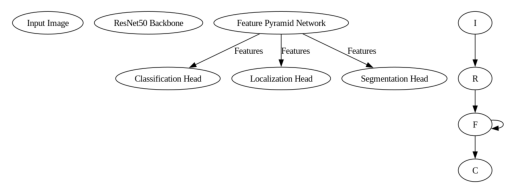

In [14]:
from graphviz import Digraph
import matplotlib.pyplot as plt

# Create a simple graph
dot = Digraph()

# Add nodes and edges
dot.node('Input', 'Input Image')
dot.node('ResNet', 'ResNet50 Backbone')
dot.node('FPN', 'Feature Pyramid Network')
dot.node('Class', 'Classification Head')
dot.node('Loc', 'Localization Head')
dot.node('Seg', 'Segmentation Head')

dot.edges(['IR', 'RF', 'FF', 'FC'])
dot.edge('FPN', 'Class', label='Features')
dot.edge('FPN', 'Loc', label='Features')
dot.edge('FPN', 'Seg', label='Features')

# Render the graph
dot.render('model_architecture', format='png')

# Display the graph
img = plt.imread('model_architecture.png')
plt.imshow(img)
plt.axis('off')
plt.show()


ERROR: Could not find a version that satisfies the requirement plotneuralnet (from versions: none)
ERROR: No matching distribution found for plotneuralnet


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/image.jpg'